In [8]:
#Part 1 Task 1
#Cleaning text
import re
import cleantext

def clean_text(input_text):

    cleaned_text=input_text.lower()
    cleaned_text = re.sub(r'\b\d{2}[-/]\d{2}[-/]\d{4}\b', '<DATE>', cleaned_text)
    cleaned_text = re.sub(r'\b\d{4}[-/]\d{2}[-/]\d{2}\b', '<DATE>', cleaned_text)
    cleaned_text = re.sub(r'\b\d{2}[-/]\d{2}[-/]\d{2}\b', '<DATE>', cleaned_text)

    cleaned_text = cleantext.clean(
        cleaned_text,
        lower=False,
        no_line_breaks=True,
        no_urls=True,
        no_emails=True,
        no_numbers=True,
        replace_with_url="<URL>",
        replace_with_email="<EMAIL>",
        replace_with_number="<NUM>"
    )
    return cleaned_text

from collections import Counter
import pandas as pd


df = pd.read_csv('news_sample.csv')
    
text_column = 'content' 

raw_data = df[text_column].dropna().tolist()  
raw_words = ' '.join(raw_data).split()
raw_word_counts = Counter(raw_words)

cleaned_data = df[text_column].dropna().apply(clean_text).tolist()  
cleaned_words = ' '.join(cleaned_data).split()
cleaned_word_counts = Counter(cleaned_words)

unique_raw_words = len(set(raw_words))
unique_cleaned_words = len(set(cleaned_words))

print(f"Unique words before cleaning: {unique_raw_words}")
print(f"Unique words after cleaning: {unique_cleaned_words}")

#Tokenize text
import nltk
tokenized_data = [nltk.word_tokenize(text) for text in cleaned_data]
tokenized_words = [word for sublist in tokenized_data for word in sublist]
unique_tokenized_words = len(set(tokenized_words))

print(f"Unique words after tokenization: {unique_tokenized_words}")

#Remove Stopwords
def remove_stopwords(tokens):
    stop_words = set(nltk.corpus.stopwords.words('english'))
    return [word for word in tokens if word not in stop_words]

tokenized_data_no_stopwords = [remove_stopwords(tokens) for tokens in tokenized_data]

filtered_tokenized_words = [word for sublist in tokenized_data_no_stopwords for word in sublist]
unique_filtered_tokenized_words = len(set(filtered_tokenized_words))

print(f"Unique words after removing stopwords: {unique_filtered_tokenized_words}")

reduction_rate = ((unique_tokenized_words - unique_filtered_tokenized_words) / unique_tokenized_words) * 100

print(f"Vocabulary reduction rate after removing stopwords: {reduction_rate}%")

#Stemming
def apply_stemming(tokens):
    stemmer = nltk.stem.PorterStemmer()
    return [stemmer.stem(word) for word in tokens]

tokenized_data_stemmed = [apply_stemming(tokens) for tokens in tokenized_data_no_stopwords]

stemmed_words = [word for sublist in tokenized_data_stemmed for word in sublist]
unique_stemmed_words = len(set(stemmed_words))

print(f"Unique words after stemming: {unique_stemmed_words}")

reduction_rate = ((unique_filtered_tokenized_words - unique_stemmed_words) / unique_filtered_tokenized_words) * 100

print(f"Vocabulary reduction rate after stemming: {reduction_rate}%")

# Convert the processed data into a DataFrame for saving
processed_data = [' '.join(tokens) for tokens in tokenized_data_stemmed]

df_processed = pd.DataFrame(processed_data, columns=['processed_content'])
df_processed.to_csv('processed_news_sample.csv', index=False)

Unique words before cleaning: 30005
Unique words after cleaning: 25425
Unique words after tokenization: 16583
Unique words after removing stopwords: 16451
Vocabulary reduction rate after removing stopwords: 0.7959958994150637%
Unique words after stemming: 11276
Vocabulary reduction rate after stemming: 31.457054282414443%


Description of procedures and libraries used:
To tokenize, I use nltk's punkt library. It's similar to what I did in exercise 1, first tokenizing and then flattening to be able to count the words easier.
To remove stopwords, I then use the stopwordrs library from the nltk corpus library. 
I use the formula (Unique Words After - Unique Words Before)/Unique Words Before x 100 to calculate the reduction rate.
To stem, I then use the PorterStemmer function, which takes tokens and applies stemming.

In [4]:
#Part 1 Task 2
#Applying it all to the 995000 rows csv file
text_column = 'content'
processed_data = []

chunk_number = 0
for chunk in pd.read_csv('995,000_rows.csv', low_memory=False, chunksize=10000):
    print(f"Processing chunk {chunk_number + 1}")
    
    #Clean Text
    raw_data = chunk[text_column].dropna().tolist()
    raw_words = ' '.join(raw_data).split()
    raw_word_counts = Counter(raw_words)

    cleaned_data = chunk[text_column].dropna().apply(clean_text).tolist()
    cleaned_words = ' '.join(cleaned_data).split()
    cleaned_word_counts = Counter(cleaned_words)

    unique_raw_words = len(set(raw_words))
    unique_cleaned_words = len(set(cleaned_words))

    print(f"Unique words before cleaning in chunk {chunk_number + 1}: {unique_raw_words}")
    print(f"Unique words after cleaning in chunk {chunk_number + 1}: {unique_cleaned_words}")

    #Tokenize text
    tokenized_data = [nltk.word_tokenize(text) for text in cleaned_data]
    tokenized_words = [word for sublist in tokenized_data for word in sublist]
    unique_tokenized_words = len(set(tokenized_words))

    print(f"Unique words after tokenization in chunk {chunk_number + 1}: {unique_tokenized_words}")

    #Remove stopwords
    tokenized_data_no_stopwords = [remove_stopwords(tokens) for tokens in tokenized_data]

    filtered_tokenized_words = [word for sublist in tokenized_data_no_stopwords for word in sublist]
    unique_filtered_tokenized_words = len(set(filtered_tokenized_words))

    print(f"Unique words after removing stopwords in chunk {chunk_number + 1}: {unique_filtered_tokenized_words}")

    reduction_rate = ((unique_tokenized_words - unique_filtered_tokenized_words) / unique_tokenized_words) * 100
    print(f"Vocabulary reduction rate after removing stopwords in chunk {chunk_number + 1}: {reduction_rate}%")

    #Stemming
    tokenized_data_stemmed = [apply_stemming(tokens) for tokens in tokenized_data_no_stopwords]

    stemmed_words = [word for sublist in tokenized_data_stemmed for word in sublist]
    unique_stemmed_words = len(set(stemmed_words))

    print(f"Unique words after stemming in chunk {chunk_number + 1}: {unique_stemmed_words}")

    reduction_rate = ((unique_filtered_tokenized_words - unique_stemmed_words) / unique_filtered_tokenized_words) * 100
    print(f"Vocabulary reduction rate after stemming in chunk {chunk_number + 1}: {reduction_rate}%")

    processed_data.extend(cleaned_data) 

    chunk_number += 1

df_processed = pd.DataFrame(processed_data, columns=['processed_content'])
df_processed.to_csv('processed_900000.csv', index=False)

Processing chunk 1
Unique words before cleaning in chunk 1: 309406
Unique words after cleaning in chunk 1: 229201
Unique words after tokenization in chunk 1: 115367
Unique words after removing stopwords in chunk 1: 115223
Vocabulary reduction rate after removing stopwords in chunk 1: 0.1248190557091716%
Unique words after stemming in chunk 1: 89081
Vocabulary reduction rate after stemming in chunk 1: 22.688178575458025%
Processing chunk 2
Unique words before cleaning in chunk 2: 306593
Unique words after cleaning in chunk 2: 229737
Unique words after tokenization in chunk 2: 116260
Unique words after removing stopwords in chunk 2: 116117
Vocabulary reduction rate after removing stopwords in chunk 2: 0.12300017202821263%
Unique words after stemming in chunk 2: 89806
Vocabulary reduction rate after stemming in chunk 2: 22.6590421729807%
Processing chunk 3
Unique words before cleaning in chunk 3: 309884
Unique words after cleaning in chunk 3: 228132
Unique words after tokenization in chun

Processing chunk 1
Processing chunk 2
Processing chunk 3
Processing chunk 4
Processing chunk 5
Processing chunk 6
Processing chunk 7
Processing chunk 8
Processing chunk 9
Processing chunk 10
Processing chunk 11
Processing chunk 12
Processing chunk 13
Processing chunk 14
Processing chunk 15
Processing chunk 16
Processing chunk 17
Processing chunk 18
Processing chunk 19
Processing chunk 20
Processing chunk 21
Processing chunk 22
Processing chunk 23
Processing chunk 24
Processing chunk 25
Processing chunk 26
Processing chunk 27
Processing chunk 28
Processing chunk 29
Processing chunk 30
Processing chunk 31
Processing chunk 32
Processing chunk 33
Processing chunk 34
Processing chunk 35
Processing chunk 36
Processing chunk 37
Processing chunk 38
Processing chunk 39
Processing chunk 40
Processing chunk 41
Processing chunk 42
Processing chunk 43
Processing chunk 44
Processing chunk 45
Processing chunk 46
Processing chunk 47
Processing chunk 48
Processing chunk 49
Processing chunk 50
Processin

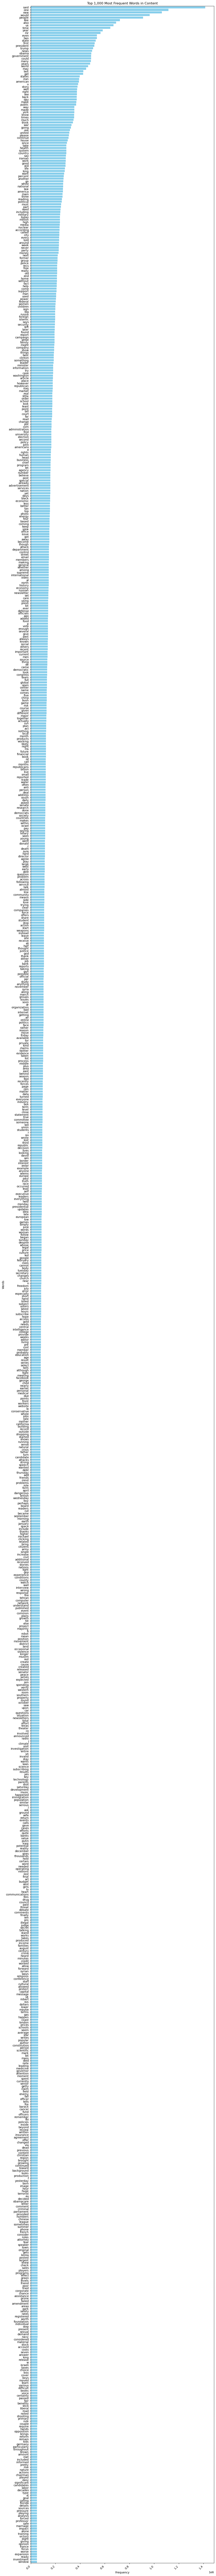

URL count: 265603
Date count: 38512
Number count: 8479613
Most common 100 words: [('said', 1415255), ('one', 1117219), ('new', 1063332), ('would', 964592), ('people', 911117), ('like', 722045), ('also', 692262), ('us', 671361), ('time', 645417), ('year', 584001), ('mr', 565380), ('even', 537206), ('two', 536821), ('state', 526126), ('first', 519451), ('president', 515719), ('trump', 506473), ('news', 498175), ('obama', 491369), ('government', 489798), ('could', 489124), ('many', 488142), ('years', 480709), ('world', 466043), ('may', 448453), ('last', 426660), ('get', 424278), ('states', 398029), ('iran', 392726), ('american', 390917), ('u', 384004), ('story', 378909), ('well', 376219), ('right', 374856), ('see', 374605), ('back', 373084), ('day', 372921), ('make', 369798), ('public', 368196), ('way', 353789), ('made', 353655), ('york', 353551), ('know', 351998), ('times', 351368), ('much', 347171), ('think', 341449), ('war', 331567), ('going', 325699), ('use', 317238), ('united', 31352

In [14]:
import matplotlib.pyplot as plt
from itertools import islice

stop_words = set(nltk.corpus.stopwords.words('english'))
def process_large_csv(file_path):
    # Initialize counters for specific patterns
    url_count = 0
    date_count = 0
    number_count = 0
    
    word_counter = Counter()

    url_pattern = r'<URL>'
    date_pattern = r'<DATE>'
    number_pattern = r'<NUM>'
    
    # Open the CSV file in chunks to avoid memory overflow
    chunk_size = 10000 # 10,000 rows per chunk
    chunk_number = 0
    for chunk in pd.read_csv(file_path, chunksize=chunk_size):
        print(f"Processing chunk {chunk_number + 1}")
        # Assuming we're analyzing all columns (or specify the relevant ones)
        text_data = chunk.astype(str).values.flatten()  # Flatten data to one list
        
        # Loop through the text data and update the counters
        for text in text_data:
            # Count specific tags
            url_count += len(re.findall(url_pattern, text))
            date_count += len(re.findall(date_pattern, text))
            number_count += len(re.findall(number_pattern, text))
            
            # Update word frequencies (ignoring <tags> by replacing them)
            cleaned_text = re.sub(r'<.*?>', '', text)  # Remove all <tags>
            words = re.findall(r'\w+', cleaned_text.lower())  # Extract words and make lowercase
            
            # Filter out stopwords
            filtered_words = [word for word in words if word not in stop_words]
            
            # Update the word counter
            word_counter.update(filtered_words)
        
        chunk_number += 1

    # Get the 100 most frequent words
    most_common_words = word_counter.most_common(100)

    # Get the 1,000 most frequent words (or the top available words if fewer than 1,000)
    top_1000_words = list(islice(word_counter.most_common(), 1000))

    # Plot the frequency of the top 1000 most frequent words
    plot_frequencies(top_1000_words)

    return url_count, date_count, number_count, most_common_words


# Function to plot the frequency of the top N words
def plot_frequencies(word_list):
    words, frequencies = zip(*word_list)  # Unzip the list of tuples into separate lists
    
    plt.figure(figsize=(12, 130))
    plt.barh(words, frequencies, color='skyblue')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.title('Top 1,000 Most Frequent Words in Content')
    
    # Rotate the y-axis labels for better readability
    plt.xticks(rotation=45, ha='right')
    plt.ylim(-0.5, len(words) - 0.5)
    plt.subplots_adjust(top=0.99, bottom=0.01, left=0.1, right=0.9)
    plt.tight_layout(pad=5.0)  # Increase the padding to avoid overlap
    plt.gca().invert_yaxis()  # Invert y-axis to display the highest frequency at the top
    plt.show()
    

# File path to the large CSV
file_path = 'processed_900000.csv'

# Process the file and get results
url_count, date_count, number_count, most_common_words = process_large_csv(file_path)

# Output the results
print(f"URL count: {url_count}")
print(f"Date count: {date_count}")
print(f"Number count: {number_count}")
print(f"Most common 100 words: {most_common_words}")

In [ ]:
import numpy

# Define file paths
input_csv = "processed_900000.csv"
train_csv = "train.csv"
val_csv = "val.csv"
test_csv = "test.csv"

# Set chunk size to process in manageable parts
chunk_size = 10000

# Open output files in write mode
with open(train_csv, "w") as train_file, \
     open(val_csv, "w") as val_file, \
     open(test_csv, "w") as test_file:

    # Read the CSV in chunks
    for i, chunk in enumerate(pd.read_csv(input_csv, chunksize=chunk_size)):
        print(f"Processing chunk {i + 1}")


        # Generate random assignment for each row
        rand_vals = numpy.random.rand(len(chunk))

        # Split data based on probabilities
        train_chunk = chunk[rand_vals < 0.8]
        val_chunk = chunk[(rand_vals >= 0.8) & (rand_vals < 0.9)]
        test_chunk = chunk[rand_vals >= 0.9]

        # Append to respective files
        train_chunk.to_csv(train_file, index=False, header=(i == 0))
        val_chunk.to_csv(val_file, index=False, header=(i == 0))
        test_chunk.to_csv(test_file, index=False, header=(i == 0))

print("Splitting complete!")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99812 entries, 0 to 99811
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   processed_content  99812 non-null  object
dtypes: object(1)
memory usage: 779.9+ KB
None
processed_content    0
dtype: int64


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


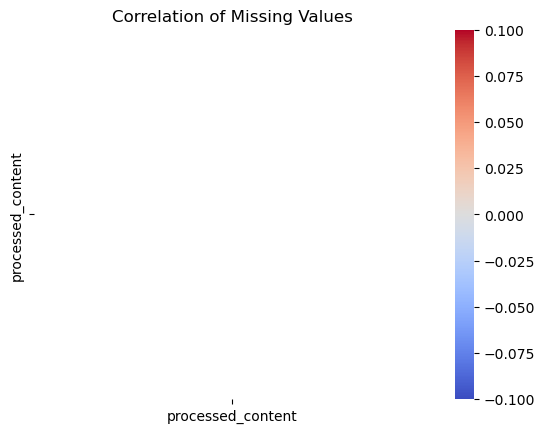

In [22]:
df = pd.read_csv("test.csv")  # Load a sample for efficiency
print(df.info())  # Overview of data types & non-null counts
print(df.isnull().sum().sort_values(ascending=False))  

missing_data = df.isnull().sum().sort_values(ascending=False)
missing_data = missing_data[missing_data > 0]  # Only show columns with missing data

import seaborn as sns

corr_matrix = df.isnull().corr()
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True)
plt.title("Correlation of Missing Values")
plt.show()

In [ ]:
import csv

def write_first_150_lines(input_file, output_file):
    with open(input_file, 'r', newline='', encoding='utf-8') as infile:
        reader = csv.reader(infile)
        lines = []
        
        # Read the first 150 lines
        for i, row in enumerate(reader):
            if i < 150:
                lines.append(row)
            else:
                break

    # Write those lines to the output file
    with open(output_file, 'w', newline='', encoding='utf-8') as outfile:
        writer = csv.writer(outfile)
        writer.writerows(lines)

# Example usage
input_file = 'processed_900000.csv'  # Replace with your input file path
output_file = 'output2.csv'  # Replace with your desired output file path
write_first_150_lines(input_file, output_file)